In [32]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [33]:
class BatterState(TypedDict):
    runs: int
    balls: int
    fours: int
    sixes: int

    sr: float
    bpb: float
    bp: float
    summary: str

In [34]:
# create the strike rate node
def calculate_sr(state: BatterState) -> BatterState:
    sr = (state['runs']/state['balls'])*100

    return {'sr': sr}

In [35]:
# create the ball per boundry node
def calculate_bpb(state: BatterState) -> BatterState:
    bpb = state['balls']/(state['fours']+state['sixes'])

    return {'bpb': bpb}

In [36]:
# create the boundary percent 
def calculate_bp(state: BatterState) -> BatterState:
    bp = ((state['fours']*4) + (state['sixes'] * 6) / state['runs']) * 100

    return {'bp':bp}

In [37]:
# create the smmary node
def summary(state: BatterState) -> BatterState:
    
    summary = f"""
Strike Rate - {state['sr']} \n 
Balls per boundary - {state['bpb']} \n
Boundary percentage - {state['bp']} \n

"""
    
    return {'summary': summary}

In [38]:
graph = StateGraph(BatterState)

# define the nodes
graph.add_node('calculate_sr', calculate_sr)
graph.add_node('calculate_bpb', calculate_bpb)
graph.add_node('calculate_bp', calculate_bp)
graph.add_node('summary', summary)


# define the edges 
graph.add_edge(START, 'calculate_sr')
graph.add_edge(START, 'calculate_bpb')
graph.add_edge(START, 'calculate_bp')

graph.add_edge('calculate_sr', 'summary')
graph.add_edge('calculate_bpb', 'summary')
graph.add_edge('calculate_bp', 'summary')


graph.add_edge('summary', END)


workflow = graph.compile()

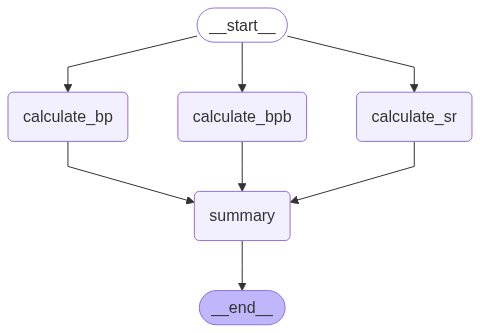

In [39]:
workflow

In [40]:
# output

initial_state = {'runs': 100, 
                 'balls': 50,
                 'fours': 6,
                 'sixes': 4,
                 
                 }

workflow.invoke(initial_state)

{'runs': 100,
 'balls': 50,
 'fours': 6,
 'sixes': 4,
 'sr': 200.0,
 'bpb': 5.0,
 'bp': 2424.0,
 'summary': '\nStrike Rate - 200.0 \n \nBalls per boundary - 5.0 \n\nBoundary percentage - 2424.0 \n\n\n'}